In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
from small_script.myFunctions import *
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [3]:
pre = "/Users/weilu/Research/server/jun_2019/membrane_contact_optimization/optimization/gammas/"
gamma_file = pre + "/protein_list_phi_contact_hybrid_well6.5_9.5_5.0_10_2.6_7.0_gamma"

In [4]:
gamma = np.loadtxt(gamma_file)

In [5]:
gamma.shape

(1380,)

In [6]:
c = 0
nwell = 2
gamma_ijm = np.zeros((nwell, 20, 20))
water_gamma_ijm = np.zeros((nwell, 20, 20))
protein_gamma_ijm = np.zeros((nwell, 20, 20))
burial_gamma_ij = np.zeros((20, 3))
membrane_burial_gamma_ij = np.zeros((20, 3))
for ii in range(2):
    for jj in range(3):
        for i in range(20):
            for j in range(i, 20):
                if jj == 0:
                    gamma_ijm[ii][i][j] = gamma[c]
                    gamma_ijm[ii][j][i] = gamma[c]
                if jj == 1:
                    protein_gamma_ijm[ii][i][j] = gamma[c]
                    protein_gamma_ijm[ii][j][i] = gamma[c]
                if jj == 2:
                    water_gamma_ijm[ii][i][j] = gamma[c]
                    water_gamma_ijm[ii][j][i] = gamma[c]
                c += 1
for ii in range(2):
    for i in range(3):
        for j in range(20):
            if ii == 0:
                burial_gamma_ij[j][i] = gamma[c]
            if ii == 1:
                membrane_burial_gamma_ij[j][i] = gamma[c]
            c += 1

In [7]:
c

1380

In [8]:
# name = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
name = "protein_list_phi_contact_hybrid_well6.5_9.5_5.0_10_2.6_7.0"
A,B,B_filtered,Gamma,Gamma_filtered,Lamb,Lamb_filtered,half_B,other_half_B,std_half_B,A_prime = get_raw_optimization_data(pre, name)


In [9]:
A_prime.dot(Gamma)

-300.9493189801

In [11]:
A_prime.dot(Gamma_filtered)

(-18.659883044199994+0j)

In [12]:
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)

In [13]:
B.shape

(1380, 1380)

(1200, 1380)

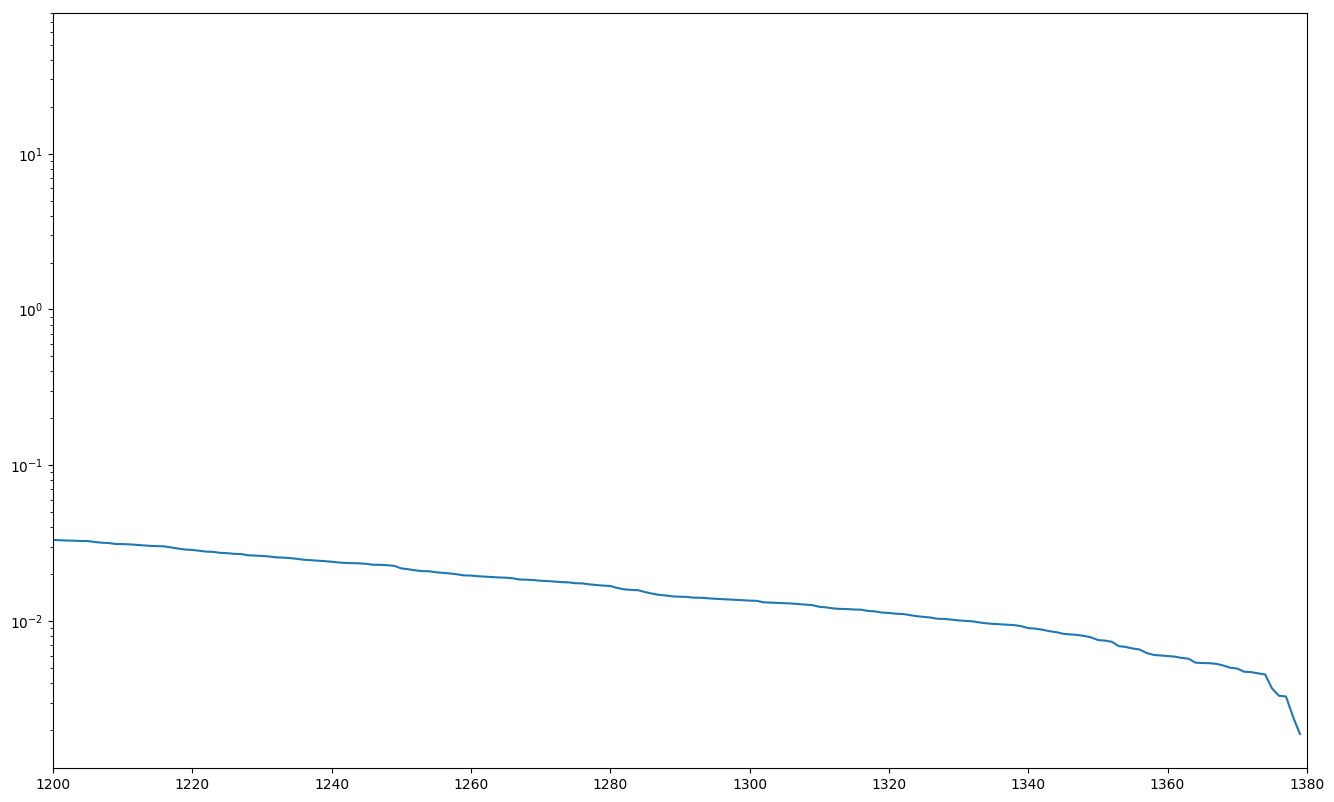

In [14]:
plt.plot(lamb)
plt.yscale("log")
plt.xlim([1200, 1380])

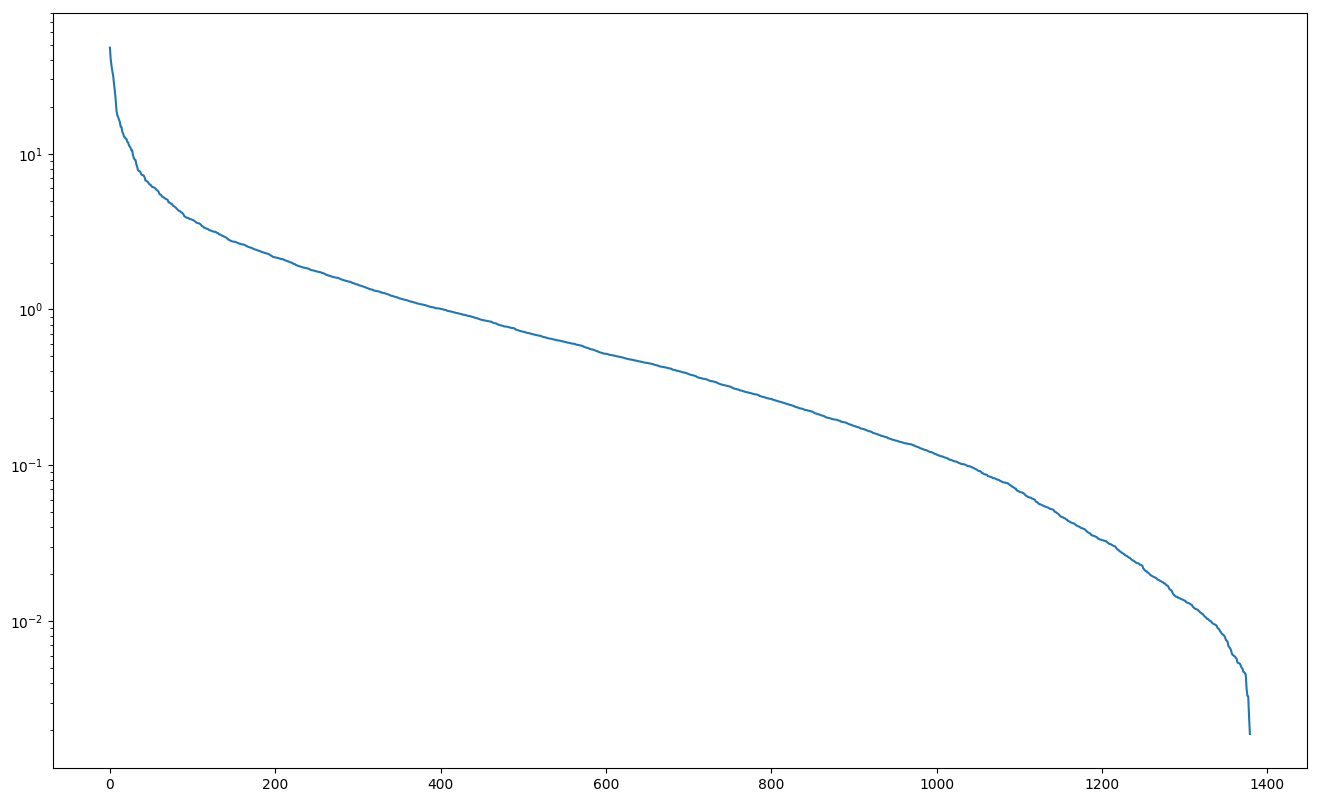

In [15]:
plt.plot(lamb)
plt.yscale("log")
# plt.xlim([1200, 1380])

In [21]:
total_phis = len(A)
num_decoys = 28000
cutoff_mode = None
cutoff_mode = 1300
filtered_gamma, filtered_B, filtered_lamb, P, lamb = get_filtered_gamma_B_lamb_P_and_lamb(
            A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, setCutoff=cutoff_mode)
filtered_B_inv =np.linalg.inv(filtered_B)
c = -300
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)



1300


In [22]:
def get_z(A, B, gamma):
    return A.dot(gamma) / np.sqrt( gamma.dot(B).dot(gamma) )

In [23]:
get_z(A, B, gamma)

11.707593952036403

In [24]:
get_z(A, B, gamma_new)

11.697436725015477

In [25]:
A_prime.dot(gamma_new)

-299.9999999999995

In [26]:
np.savetxt("/Users/weilu/Research/server/jun_2019/membrane_contact_optimization/optimization/gammas/gamma_1300_c300", gamma_new)



In [27]:
np.savetxt("/Users/weilu/Research/server/jun_2019/amphibian/setup/2xov/gamma_1300", gamma_new)

In [61]:
np.savetxt("/Users/weilu/Research/server/jun_2019/amphibian/setup/2xov/gamma_1100", gamma_1100)
np.savetxt("/Users/weilu/Research/server/jun_2019/amphibian/setup/2xov/gamma_1300", gamma_1300)

In [56]:
gamma.shape

(1380,)

1

In [31]:
# convert to standard gamma
gamma = np.zeros(690)
c = 0
ii = 0
for jj in range(3):
    for i in range(20):
        for j in range(i, 20):
            if jj == 0:
                gamma[c] = gamma_ijm[ii][i][j]
            if jj == 1:
                gamma[c] = protein_gamma_ijm[ii][i][j]
            if jj == 2:
                gamma[c] = water_gamma_ijm[ii][i][j]
            c += 1
print(c)
for i in range(3):
    for j in range(20):
        if ii == 0:
            gamma[c] = burial_gamma_ij[j][i]
        if ii == 1:
            gamma[c] = membrane_burial_gamma_ij[j][i]
        c += 1

630


In [29]:
np.savetxt("/Users/weilu/Research/server/jun_2019/amphibian/converted_original_membrane_gamma_2.dat", gamma)

In [32]:
np.savetxt("/Users/weilu/Research/server/jun_2019/amphibian/converted_original_gamma_2.dat", gamma)

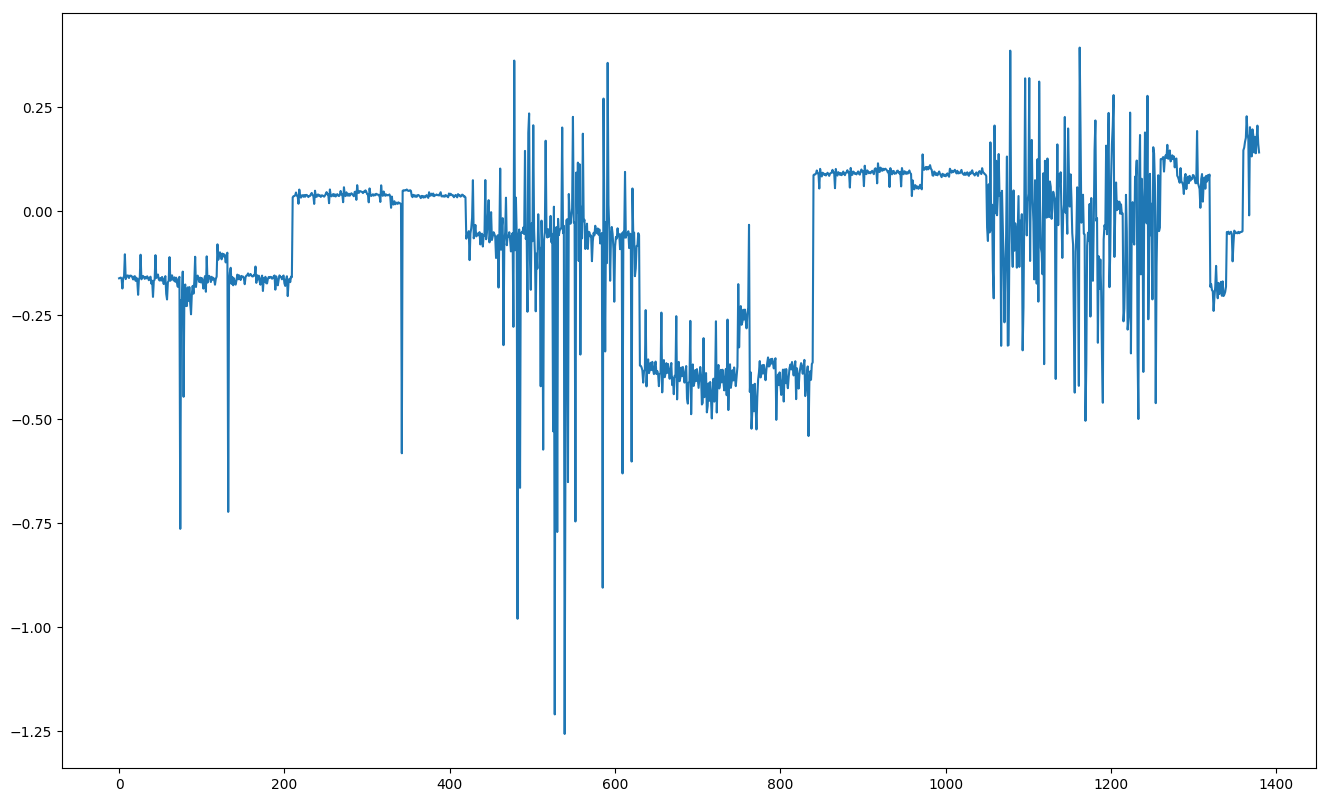

In [53]:
plt.plot(gamma_1200-gamma_1100)

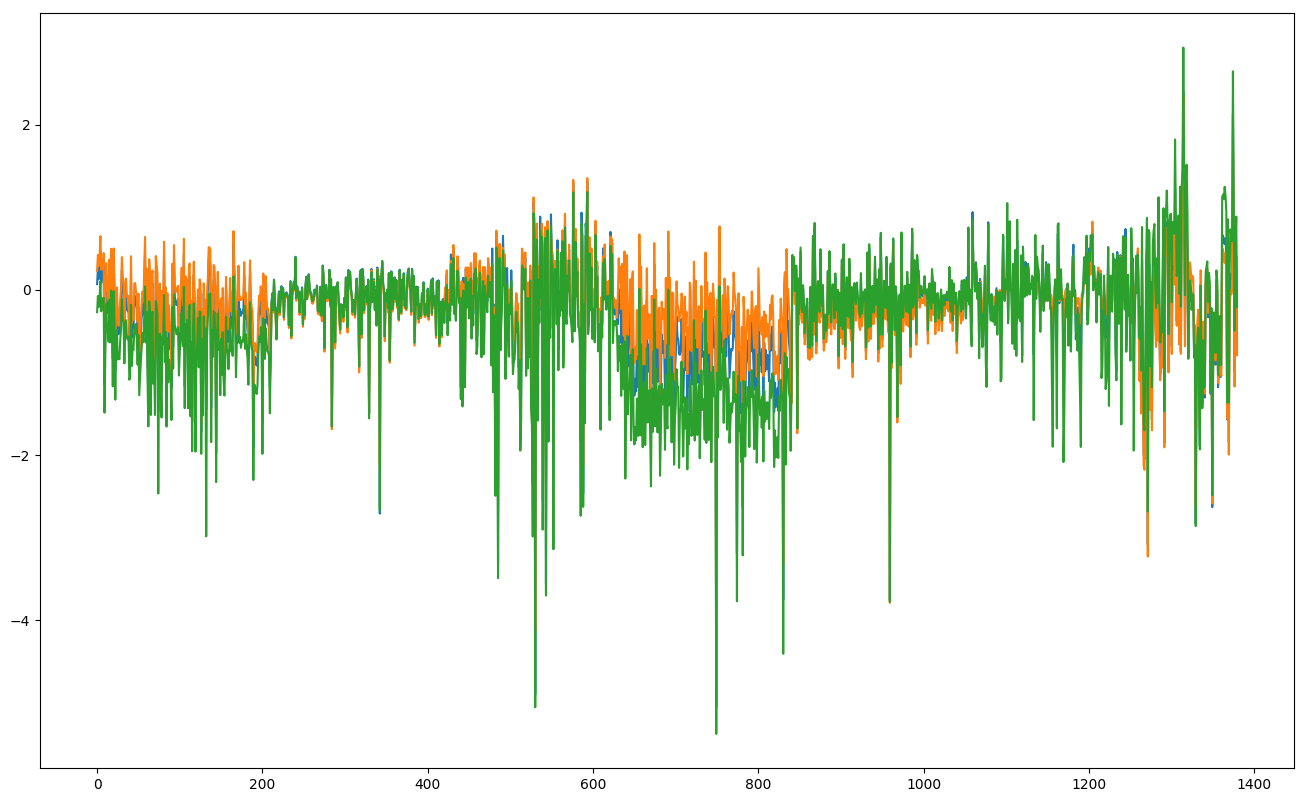

In [59]:
plt.plot(gamma_1200)
plt.plot(gamma_1100)
plt.plot(gamma_1300)

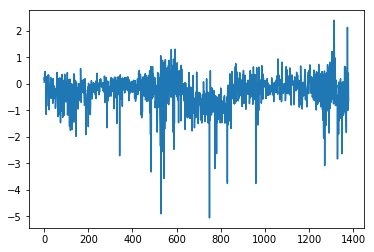